# <center>Projet Deep Learning - Exercice de classification</center>

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
import glob

from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from keras.layers.core import Dense, Flatten
from tensorflow.keras.layers import InputLayer
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

On va afficher 5 images random présentes dans le fichier.

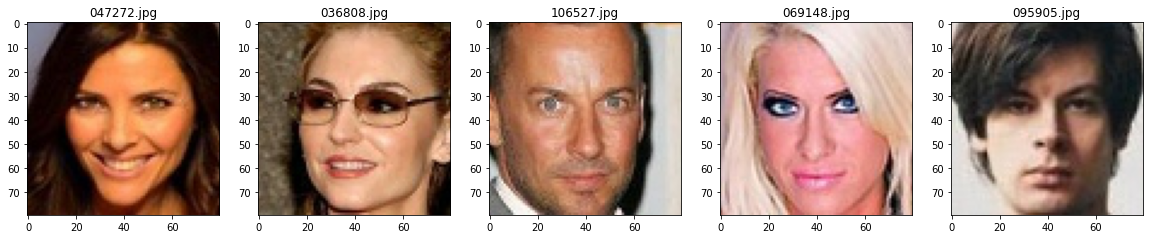

In [2]:
plt.figure(figsize=(20,20))
img_folder=os.path.join(r'c:\\Users\\Armel\\Desktop\\Cours_ESIEA\\Github\\Deep_Learning\\nov2021_train')
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

##### Création des données d'image et des étiquettes à partir des images du dossier

- Le dossier source est le paramètre d'entrée contenant les images des différentes classes.

- Lire le fichier image du dossier et le convertir au bon format de couleur.

- Redimensionnez l'image en fonction de la dimension d'entrée requise pour le modèle.

- Convertir l'image en un tableau Numpy avec float32 comme type de données.

- Normaliser le tableau d'images pour avoir des valeurs réduites entre 0 et 1 de 0 à 255 pour une distribution de données similaire, ce qui permet une convergence plus rapide.

In [3]:
os.listdir(img_folder)

['000000.jpg',
 '000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.j

In [4]:
file = open('label_nov2021_train.txt', "r")
# utilisez readline() pour lire la première ligne
line = file.readline()
while line:
    print(line)
    # utilisez readline() pour lire la ligne suivante
    line = file.readline()
file.close()

1

1

0

0

0

1

1

1

0

1

0

1

1

1

0

1

0

1

1

1

1

1

0

1

0

1

0

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

0

0

1

1

0

1

1

1

1

1

1

0

1

1

1

0

1

1

0

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

1

1

1

1

1

1

1

1

0

0

1

1

0

1

1

0

1

1

1

1

1

1

0

0

1

0

0

1

0

1

1

1

0

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

1

0

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

0

0

1

1

1

0

1

1

0

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

0

1

0

1

1

1

0

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

0

1

0

0

0

0

1

1

0

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

0

1

1

0

1

1

1

0

0

0

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

0

0

1

1

0

0

0

1

1

0

1

0

1

1

0

0

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

0

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

1

0

1

1

1

1

0

1

0

1

0

1

0

1

0

0

1

0

1

1

0

1

0

1

1

0

1

1

1

0

1

1

0

1

0

1

0

0

1

1

1

1

1

0

1

0

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

0

0

1

0

0

1

1

1

0

1

1

0

1

0

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

0

1

0

1

1

1


1

1

1

0

1

0

1

1

1

1

0

1

1

1

0

0

1

1

1

0

1

0

1

1

1

1

0

1

0

1

0

1

1

1

0

1

0

1

1

1

0

1

1

1

0

1

0

1

0

1

1

1

1

1

1

0

1

0

1

1

1

1

1

0

0

1

0

0

1

0

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

0

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

0

0

1

0

0

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

0

1

0

1

0

1

1

0

1

1

1

0

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

0

1

1

0

1

1

1

0

1

1

1

1

1

0

1

1

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

0

1

0

0

1

0

1

0

1

1

1

0

1

1

1

1

0

1

1

1

0

0

0

1

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1




1

0

1

1

1

1

1

1

1

1

0

1

1

0

1

0

1

0

0

0

1

0

0

1

1

1

0

1

1

1

0

0

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

0

1

0

1

1

0

0

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

0

1

1

1

0

0

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

0

1

0

1

0

0

1

1

1

1

1

0

1

1

1

0

0

1

1

1

0

0

1

1

1

0

0

1

0

1

0

0

1

1

0

1

0

0

0

0

0

1

0

1

1

1

1

0

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

0

1

0

1

1

1

0

1

1

1

1

1

1

0

1

1

0

1

1

1

1

0

1

1

1

0

0

0

1

1

1

1

1

0

0

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

0

1

1

1

0

1

0

1

0

1

0

1

1

1

0

1

0

0

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

0

1

0

0

0

1

1

0

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1



0

1

1

1

0

1

1

1

1

0

1

1

1

0

0

1

0

1

0

0

0

1

0

1

0

1

0

1

1

0

1

1

0

1

1

1

0

1

0

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

0

1

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

0

0

0

0

1

1

0

1

1

0

0

0

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

0

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

0

0

0

1

1

1

1

1

0

0

0

1

0

0

0

0

1

1

1

0

1

0

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

1

0

1

1

1

1

0

0

1

0

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

0

0

0

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

0

1

1

0

1

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

0

1

1

0

1

0

1

1

0

1

0

1

1

0

1

1

1

1


0

1

1

0

1

1

1

1

1

1

1

1

0

1

0

0

1

1

1

1

0

1

1

0

1

1

1

0

0

1

0

1

1

1

0

1

1

1

1

1

0

0

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

0

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

1

0

1

0

1

0

0

1

1

0

1

1

1

1

1

1

1

1

1

0

0

1

1

0

1

0

1

0

0

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

0

1

1

0

0

1

0

1

1

1

0

0

1

0

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

0

0

1

1

0

1

1

1

0

0

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

0

1

0

0

1

0

0

1

1

0

0

0

1

1

1

1

1

0

0

1

1

1

0

1

1

1

0

0

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

0

1

1

1

0

1

1

1

1

0

1

0

1




1

1

1

0

0

1

0

1

0

0

1

0

1

0

1

1

1

0

1

0

0

1

1

0

1

1

1

0

1

0

1

0

1

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

0

1

1

0

0

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

1

0

0

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

0

1

0

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

0

0

1

0

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

1

1

1

0

1

0

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

0

1

0

1

0

1

0

1

1

1

0

1

0

1

1

1

0

1

1

1

1

0

0

0

1

1

1

1

0

1

0

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

0

0

1

0

1

0

1

1

1

0

1

1

1

1

1

0

1

0

1

0

0

0

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1




1

0

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

0

1

0

1

1

1

0

1

0

1

0

0

1

1

0

0

1

1

1

0

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

0

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

0

1

1

1

0

1

1

1

0

1

1

0

1

1

1

0

1

0

0

1

1

1

1

0

1

1

1

1

1

0

1

0

0

1

1

0

1

0

0

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

0

1

1

1

1

1

1

0

1

1

1

0

1

1

0

1

0

1

0

1

1

1

1

0

1

0

1

1

1

0

0

1

1

0

1

1

1

1

1

0

0

0

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

0

1

1

1

1

0

1

1

1

0

1

0

1

1

1

0

1

0

1

0

0

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

0

1

0

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

0

1

0

1

0

0

0

1

0

1

0

1

1

1

1

1

0

1

0

1

1

0



1

1

1

0

1

1

1

1

1

1

1

1

0

1

0

0

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

0

1

0

0

1

1

1

1

0

0

1

1

0

0

0

0

1

0

1

0

1

0

0

1

1

1

0

1

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

0

0

1

0

1

1

0

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

0

1

1

1

0

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

0

0

0

1

0

1

0

1

1

0

0

1

0

1

1

1

0

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

1

1

0

1

0

0

1

1

1

1

0

1

0

1

1

1

0

1

0

1

0

1

1

0

1

0

0

1

1

1

1

0

1

0

1

1

0

0

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

0

1

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

1

0

1

0

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

0

1

1

1

0

0

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

0

0

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

0

0

1

1

0

1

1

0

0

1

1

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

0

1

1

0

1

0

0

1

1

1

0

1

1

1

1

0

0

1

1

0

1

1

0

1

1

1

0

1

0

0

1

1

1

1

1

0

0

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

0

1

0

1

0

0

1

1

1

1

1

0

1

0

1

1

1

1

1

0

0

1

0

0

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

0

0

1

1

1

1

1

0

1

1

1

0

0

0

1

1

1

1

0

1

1

1

1

1

0

0

1

0

1

0

1

1

1

1

0

0

0

1

1

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

0

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

0

1

0

0

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

0

1

1

1

0

1

0

1

1

0

1

1

1

0

1

1

0

0

0

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

0

1

0

0

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

0

1

0

0

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

0

0

0

1

1

1

0

0

1

1

0

1

1

1

0

1

1

0

0

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

0

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

0

1

0

0

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

0

0

1

0

1

1

1

1

1

0

1

0

1

0

1

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

1

1

1

0

1

0

1

0

1

0

1

0

1

0

1

0

1

1

0

0

1

1

0

1

1

0

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

0

1

1

0

1

1

0

0

1

0

1

1

0

0

1

1

0

1

1

1

1

0

1

0

1

1

1

1

0

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

0

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

0

1

1

0

0

1

1

1

1

0

1

0

1

1

1

0

1

1

0

1

0

1

1

1

1

1

1

1

1

0

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

0

1

1

0

1

0


0

1

1

1

0

1

1

1

1

1

1

0

1

1

1

0

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

0

1

1

0

0

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

0

1

1

0

1

0

1

0

1

1

1

0

0

1

1

1

1

1

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

0

0

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

0

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

0

0

1

0

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

0

1

1

0

1

1

1

1

0

0

1

0

1

0

0

0

1

1

0

0

1

0

0

1

1

1

1

1

1

1

1

0

0

1

0

1

1

0

1

0

1

1

1

1

0

1

0

1

0

1

1

0

1

0

1

0

1

1

1

0

1

1

1

0

1

1

1

0

1

1



0

1

0

0

1

1

1

0

1

0

1

0

1

1

1

0

1

0

0

1

1

1

1

1

1

1

1

1

1

0

1

1

0

0

1

1

1

0

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

0

1

0

0

1

1

1

1

1

0

1

1

0

1

0

1

0

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

0

1

0

0

1

0

1

1

1

1

0

1

1

0

1

1

1

0

1

0

0

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

0

0

1

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

0

1

0

0

1

1

0

0

1

1

1

1

1

0

1

0

0

1

0

1

0

1

1

1

1

1

1

0

1

1

0

1

0

1

1

0

1

1

0

1

1

0

1

1

0

1

0

1

1

1

0

1

1

0

1

1

1

1

1

0

1

0

1

0

1

1

1

1

0

1

0

0

1

0

1

0

1

0

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

0

0

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

0

1

1

1

0

1

1

1

0

1

1

0

0

1

1

1

0

1

1

1

1

1

0

1

0

0

1

0

1

0

1

1

1

1

1

0

1

1

1

0

1

0

1

0

0

1

1

1

1

1

0

1

1

0

0

1

0

1

1

1

0

1

1

1

0

1

1

1

1

0

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

0

1

0

1

0

1

1

0

1

1

0

1

1

1

0

1

1

1

1

1

0

1

1

0

1

0

1

0

1

1

0

1

1

0

1

1

1

0

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

0

0

1

0

1

0

1

1

0

1

1

1

0

1

1

0

1

1

1

0

1

1

1

1

1

1

1

0

0

0

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

1

1

0

0

1

1

0

1

0

1

1

1

0

0

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

0

1

0

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

0

1

1

0

1

0

1

0

1

0

1

1

1

0

1

1

1

1

1

1

0

1

0

1

0

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

0

1

1

0

0

1

1

1

0

1

1

1

0

1

0

1

0

0

1

0

0

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

0

1

0

0

1

1

1

1

1

1

1

0

1

0

0

0

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

0

1

1

1

0

1

1

0

1

0

0

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

0

1

0

1

1

0

1

0

1

0

0

1

0

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

0

0

1

1

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

0

1

0

1

1

1

1

1

1

0

1

1

0

1

0

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

0

1

0

1

0

1

0

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

0

1

1

1

0

1

0

0

1

1

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

0

1

0

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

0

0

1

0

1

1

1

1

0

1

1

1

0

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

0

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

0

0

1

1

1

1

1

1

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

0

0

1

1

0

1

0

0

1

1

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

0

1

0

1

1

1

1

0

1

0

1

1

0

1

1

0

1

0

1

0

1

0

1

1

0

1

1

1

0

1

1

0

1

0

1

0

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

0

1

1

1

0

1

1

0

0

1

0

0

1

0

1

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

1

0

1

1

1

0

1

1

0

1

0

1

1

1

0

0

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

1

0

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

0

0

1

0

1

1

1

0

1

0

1

1

1

0

1

0

1

1

0

1

1

1

0

1

0

1

0

0

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

0

1

0

1

1

0

0

0

1

1

1

1

0

0

1

1

1

0

1

1

0

1

0

1

0

0

1

0

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

0

1

1

1

0

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

0

0

1

0

1

1

1

1

1

0

1

1

1

1

0

0

0

1

0

0

0

1

0

1

1

1

0

0

1

1

1

0

0

1

0

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

0

1

1

1

0

1

1

1

0

1

1

0

1

0

0

1

1

1

1

0

1

0

1

1

1

1

1

0

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

0

1

0

1

1

0

1

0

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

0

0

1

1

1

1

0

1

1

1

1

0

1

0

1

1

0

0

1

1

1

1

1

1

1

0

1

0

0

1

1

1

1

0

1

1

0

0

1

1

0

0

1

1

1

1

1

1

0

1

1

0

1

0

1

0

1

1

1

0

0

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

0

1

0

1

0

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

0

1

1

0

1

1

1

0

1

0

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

0

0

1

1

0

1

0

1

0

1

1

1

1

0

1

0

0

1

1

1

0

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

0

1

0

1

0

0

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

0

0

1

1

1

1

0

1

0

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

0

1

1

1

0

0

1

0

1

0

1

0

1

0

1

0

1

0

0

1

1

0

1

1

1

0

1

1

0

1

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

0

0

1

0

0

1

0

0

0

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

0

1

0

1

0

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

0

1

0

1

0

1

1

1

1

1

0

0

1

1

1

1

1

1

0

1

1

0

1

0

0

1

1

1

0

1

1

0

0

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

0

0

1

0

0

1

0

0

1

1

1

1

1

0

1

1

0

1

0

1

1

0

1

1

1

1

1

0

1

0

1

0

1

1

0

0

0

1

0

1

0

1

0

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

0

1

0

1

1

0

1

1

0

0

1

1

0

1

0

1

0

1

1

1

1

1

0

0

1

0

1

0

1

1

0

1

1

1

1

0

1

1

1

1

1

0

1

0

1

0

1

0

1

1

1

1

0

1

1

1

0

0

1

1

1

0

0

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

0

1

1

0

1

1

1

0

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

0

0

1

0

1

1

0

0

1

1

1

1

1

0

1

1

0

1

1

0

1

1

0

1

1

1

1

1

0

1

0

1

0

0

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

0

1

0

0

1

0

1

1

0

1

1

1

0

1

0

1

1

0

0

1

1

1

0

1

1

0

0

1

0

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

0

0

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

0

1

0

1

1

0

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

0

1

1

0

1

0

0

1

0

0

1

0

1

1

1

1

1

1

1

1

0

1

1

0

1

0

1

1

1

0

1

0

0

1

0

1

1

1

1

1

0

1

1

1

0

1

0

0

1

0

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

0

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

0

1

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

0

0

1

0

1

0

1

1

1

1

0

1

1

0

1

1

1

0

1

1

0

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

0

1

1

1

0

1

0

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

0

1

0

0

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

0

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

1

0

1

0

1

1

0

1

1

1

1

0

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

0

1

1

1

1

1

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

0

1

1

1

0

0

1

1

1

0

1

0

1

0

0

1

1

0

1

1

0

1

1

1

1

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

0

1

0

0

1

1

0

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

1

0

1

1

1

1

0

0

1

1

1

0

1

0

1

1

1

1

1

1

1

0

0

1

0

1

0

1

0

1

1

1

0

1

0

1

1

1

1

1

0

1

0

0

1

0

0

1

1

1

1

0

1

1

1

0

1

0

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

0

0

0

0

1

0

0

1

1

1

1

0

0

1

0

0

1

1

0

1

1

1

0

1

1

1

1

1

1

0

1

1

0

1

1

1

1

0

1

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

1

1

0

1

1

0

1

0

1

1

1

1

1

1

0

1

1

1

1

0

0

1

0

0

1

0

0

1

0

1

1

1

0

1

0

1

0

1

1

1

1

0

1

0

1

1

0

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

0

0

1

0

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

1

0

1

1

0

0

1

0

1

0

1

1

0

0

1

1

0

1

0

1

1

1

0

1

1

1

0

1

1

1

1

0

1

0

1

0

0

1

1

1

1

0

1

0

1

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

0

1

0

1

0

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

0

1

1

1

0

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

0

1

1

1

0

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

0

1

1

0

1

1

1

1

1

1

0

1

1

0

1

0

1

1

1

0

1

0

1

0

0

1

0

1

1

0

0

1

0

1

1

1

0

1

0

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

0

0

1

0

0

1

1

1

1

1

1

1

0

0

1

1

1

1

0

1

0

1

1

1

1

0

1

0

1

1

0

1

0

1

0

1

1

1

1

1

0

0

1

0

1

0

1

0

1

0

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

0

1

1

0

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

0

1

1

1

0

1

1

1

0

0

1

1

0

1

0

0

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

0

0

1

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

0

0

1

1

1

1

0

1

0

1

0

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

0

1

1

1

0

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

0

1

1

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

0

1

1

0

1

1

0

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

0

1

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1

1

1

0

1

1

0

1

0

1

1

1

1

0

1

0

0

1

1

1

1

0

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

1

0

1

1

1

1

1

1

1

0

1

1

0

0

1

0

1

0

1

0

1

0

0

1

1

1

1

0

1

1

1

0

0

1

1

0

0

0

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

0

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

0

1

0

1

1

0

1

0

1

0

0

1

0

0

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

0

0

1

0

1

1

0

1

0

1

0

1

0

1

1

0

1

1

0

1

1

0

1

1

1

0

1

0

1

1

0

0

0

1

0

1

1

1

0

0

1

1

1

1

1

1

1

0

1

1

1

1

0

1

0

1

0

1

0

0

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

0

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

1

1

0

1

1

1

1

0

1

0

0

0

1

1

1

0

0

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

0

1

0

1

0

1

0

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

0

1

1

1

1

0

1

1

1

1

0

0

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

1

0

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

1

0

1

0

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

0

1

0

0


0

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

0

0

0

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

0

1

1

1

0

1

1

0

1

0

1

0

1

1

0

1

1

1

1

0

1

1

0

0

1

1

1

1

1

0

0

1

0

1

1

1

1

1

0

0

1

1

1

1

1

1

0

0

1

1

0

1

1

1

0

1

1

1

0

0

1

0

1

1

1

1

1

0

1

1

1

1

0

0

0

0

1

1

0

1

0

1

1

1

0

0

1

1

1

1

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

0

1

1

1

0

1

0

0

0

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

1

0

1

1

0

0

1

0

0

1

1

1

1

0

0

1

1

1

1

1

1

1

1

0

0

1

0

1

1

0

1

1

1

1

1

1

0

1

1

1

0

0

0

1

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

0

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

0

0

1

0

1

1

1

0

0

1

1

1

1

1

1

0

1

0

0

1

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

1

0

1



1

0

0

1

1

0

1

0

1

1

1

0

1

0

1

1

1

1

1

0

1

1

0

1

1

0

1

0

1

0

0

1

1

1

1

1

0

1

0

1

1

0

1

0

1

0

1

0

1

1

1

0

1

0

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

0

1

0

0

1

1

1

1

0

1

1

1

0

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

1

0

1

1

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

0

1

0

1

1

1

1

0

0

1

0

1

0

1

0

1

1

1

0

1

1

1

0

1

0

1

0

1

1

0

1

1

1

0

1

0

1

0

1

0

1

1

1

1

1

1

1

1

1

1

1

0

1

0

1

1

1

1

0

1

1

1

1

1

1

1

0

1

1

1

0

1

0

0

1

0

1

1

1

0

1

1

0

1

1

0

1

1

1

1

1

0

1

0

1

1

1

0

1

1

1

1

1

1

1

0

1

0

1

1

1

1

1

1

0

1

1

0

1

1

1

1

1

1

1

1

0

1

1

0

0

1

0

1

1

1

1

1

1

1

0

1

0

1

0

1

0

In [9]:
# Modification de la dimension des images 
IMG_WIDTH=200
IMG_HEIGHT=200

def create_dataset(img_folder, nb):
   
    dict_df = {}
    img_data_array=[]
    class_name=[]
    label_file = open('label_nov2021_train.txt', "r")
    label_file = label_file.readlines()
    imageList = os.listdir(img_folder)
    
    for i in range(nb):
        image = imageList[i]
        image_path= os.path.join(img_folder, image)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float64')
        image /= 255.0 
        img_data_array.append(image)
        class_name.append(label_file[i].replace("\n",""))
    file.close()
    return pd.DataFrame({'Image num': img_data_array,'label': class_name})
# extract the image array and class name
df = create_dataset(img_folder, 100)

In [12]:
df.to_csv(r'dataset.csv', index = False, sep = ';')
print(df)

                                            Image num label
0   [[[0.6313725490196078, 0.6078431372549019, 0.4...     1
1   [[[0.047058823529411764, 0.01568627450980392, ...     1
2   [[[0.023529411764705882, 0.054901960784313725,...     0
3   [[[0.07450980392156863, 0.18823529411764706, 0...     0
4   [[[0.011764705882352941, 0.0, 0.27058823529411...     0
..                                                ...   ...
95  [[[0.2627450980392157, 0.3411764705882353, 0.4...     1
96  [[[0.9529411764705882, 0.9490196078431372, 0.9...     1
97  [[[0.00784313725490196, 0.043137254901960784, ...     1
98  [[[0.47843137254901963, 0.4588235294117647, 0....     1
99  [[[0.03137254901960784, 0.08235294117647059, 0...     0

[100 rows x 2 columns]
